In [22]:
"""
=========================================================
ESNRegressor with GridSearch
=========================================================

This example shows a minimal example of Echo State Network
applied to a regression problem using a Grid Search 
cross-validation directly from scikit-learn.
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

from echoes import ESNRegressor

# Prepare synthetic data 
x = np.linspace(0, 30*np.pi, 1000).reshape(-1,1)
inputs = np.sin(x) + np.random.normal(scale=.2, size=x.shape)
outputs = np.cos(x) + np.random.normal(scale=.2, size=x.shape)

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=.3, shuffle=False)

cv = GridSearchCV(
    estimator=ESNRegressor(
        n_transient=100,    
        regression_method="pinv",
        random_state=42
    ),
    param_grid={
        "n_reservoir": [20, 50, 100, 150],
        "leak_rate": [0.2, 0.4, 0.8],
        "spectral_radius": [0.85, 0.9, 0.95],
    }
)
cv.fit(X_train, y_train)

GridSearchCV(estimator=ESNRegressor(n_transient=100, random_state=42,
                                    spectral_radius=0.95),
             param_grid={'leak_rate': [0.2, 0.4, 0.8],
                         'n_reservoir': [20, 50, 100, 150],
                         'spectral_radius': [0.85, 0.9, 0.95]})

In [23]:
#import pandas as pd
#pd.DataFrame(cv.cv_results_)

In [24]:
cv.best_score_

np.float64(0.8829837854254151)

In [25]:
esn = cv.best_estimator_

training r2 score:  0.9252045368816031
test r2 score:  0.915354240210539


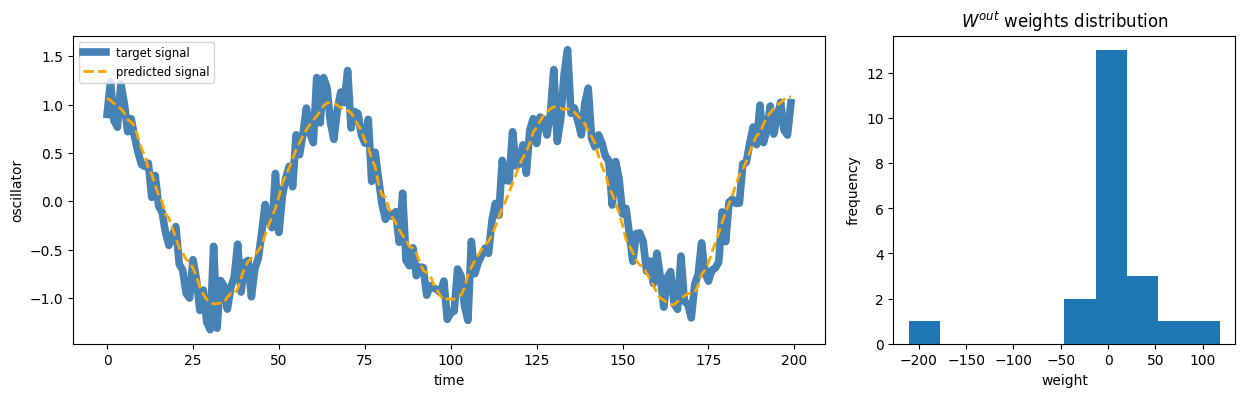

In [26]:
print("training r2 score: ", esn.score(X_train, y_train))
print("test r2 score: ", esn.score(X_test, y_test))

# Get prediction for plotting
y_pred = esn.predict(X_test)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, (1, 2))
plt.plot(y_test[esn.n_transient:], label='target signal',
         color="steelblue", linewidth=5.5)
plt.plot(y_pred[esn.n_transient:], label='predicted signal',
         linestyle='--', color="orange",  linewidth=2,)
plt.ylabel("oscillator")
plt.xlabel('time')
plt.legend(fontsize=("small"), loc=2)

plt.subplot(1, 3, 3)
plt.title(r"$W^{out}$ weights distribution")
plt.xlabel('weight')
plt.ylabel('frequency')
plt.hist(esn.W_out_.flat);